In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
%matplotlib inline

In [2]:
base_dir = "../../../data/amplicon_sequencing/funestus/"

In [3]:
data = pd.read_csv(base_dir + "data_threeway.csv", 
                     dtype={"3Ra_cyto" : str, "3Ra_amp" : str, 
                            "3Ra_oa" : str, "3Rb_cyto" : str,
                            "3Rb_amp" : str, "3Rb_oa" : str,
                           "2Ra_cyto":str, "2Ra_amp":str})
data.replace(np.nan, "missing", inplace=True)
data.replace("No_cytoKaryotype", "missing", inplace=True)
data.replace('NA', 'missing', inplace=True)
data.head()

,SpecimenID,village,chormosomal form,3Ra_cyto,3Ra_amp,3Ra_oa,code_3Ra,concat,3Rb_cyto,3Rb_amp,3Rb_oa,code_3Rb,concat.1,2Ra_cyto,2Ra_amp,concat.2
0,00-00022,Koubri,Kiribina,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00-00024,Koubri,Kiribina,1,1,1,0,111,0,0,0,0,0,0,0,0
2,00-00025,Koubri,Folonzo,1,1,1,0,111,2,2,2,0,222,0,0,0
3,00-00029,Koubri,Kiribina,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00-00030,Koubri,Kiribina,1,1,1,0,111,0,0,0,0,0,0,0,0


In [4]:
data["3Ra_concat"] = data["3Ra_cyto"].map(str) +\
                    data["3Ra_amp"].map(str) +\
                    data["3Ra_oa"].map(str)

data["3Rb_concat"] = data["3Rb_cyto"].map(str) +\
                    data["3Rb_amp"].map(str) +\
                    data["3Rb_oa"].map(str)

data["2Ra_concat"] = data["2Ra_cyto"].map(str) +\
                    data["2Ra_amp"].map(str)

data.head()

,SpecimenID,village,chormosomal form,3Ra_cyto,3Ra_amp,3Ra_oa,code_3Ra,concat,3Rb_cyto,3Rb_amp,3Rb_oa,code_3Rb,concat.1,2Ra_cyto,2Ra_amp,concat.2,3Ra_concat,3Rb_concat,2Ra_concat
0,00-00022,Koubri,Kiribina,0,0,0,0,0,0,0,0,0,0,0,0,0,000,000,00
1,00-00024,Koubri,Kiribina,1,1,1,0,111,0,0,0,0,0,0,0,0,111,000,00
2,00-00025,Koubri,Folonzo,1,1,1,0,111,2,2,2,0,222,0,0,0,111,222,00
3,00-00029,Koubri,Kiribina,0,0,0,0,0,0,0,0,0,0,0,0,0,000,000,00
4,00-00030,Koubri,Kiribina,1,1,1,0,111,0,0,0,0,0,0,0,0,111,000,00


In [5]:
data["3Ra_concat"].unique()

array(['000', '111', '222', '221', '011', '211', '022', '200',
       'Missingmissingmissing'], dtype=object)

In [6]:
pd.concat([data["3Ra_concat"], data["3Rb_concat"]]).unique()

array(['000', '111', '222', '221', '011', '211', '022', '200',
       'Missingmissingmissing', '100', '110', 'missingmissingmissing',
       '101', '002', '010', '021', 'mssing missingmissing'], dtype=object)

In [7]:
trans_dict = {key : None for key in pd.concat([data["3Ra_concat"], 
                                               data["3Rb_concat"]]).unique()}

for key in trans_dict.keys():
    
    if "missing" in key:
        
        trans_dict[key] = 5
        
    elif key == "000" or key == "111" or key == "222":
        
        trans_dict[key] = 0
        
    elif key == "021" or key =="210":
        
        trans_dict[key] = 4
        
    elif key == "221" or key == "110" or key == "002":
        
        trans_dict[key] = 2
        
    elif key == "011" or key == "211" or key == "022" or key == "200" or key == "100":
        
        trans_dict[key] = 1
        
    elif key == "101" or key == "010":
        
        trans_dict[key] = 3
        
    else:
        
        print(key)

In [8]:
trans_dict

{'000': 0,
 '111': 0,
 '222': 0,
 '221': 2,
 '011': 1,
 '211': 1,
 '022': 1,
 '200': 1,
 'Missingmissingmissing': 5,
 '100': 1,
 '110': 2,
 'missingmissingmissing': 5,
 '101': 3,
 '002': 2,
 '010': 3,
 '021': 4,
 'mssing missingmissing': 5}

In [9]:
trimmed = data[["SpecimenID", "3Ra_concat", "3Rb_concat"]].sort_values(
    "SpecimenID").set_index("SpecimenID").replace(trans_dict)

trimmed.head()

,3Ra_concat,3Rb_concat
SpecimenID,,
00-00022,0,0
00-00024,0,0
00-00025,0,0
00-00029,0,0
00-00030,0,0


In [10]:
trimmed["3Ra_concat"].value_counts()

0    211
1     17
5      1
2      1
Name: 3Ra_concat, dtype: int64

In [11]:
trimmed["3Rb_concat"].value_counts()

0    183
1     20
5     10
2     10
3      6
4      1
Name: 3Rb_concat, dtype: int64

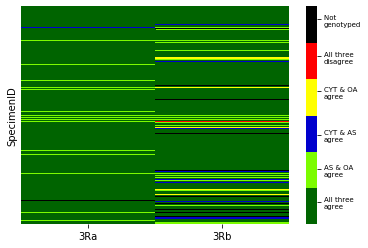

In [12]:
heat_map = sns.heatmap(trimmed, 
                       cmap = ['darkgreen', 'lawngreen', 'mediumblue', 
                               'yellow', 'red', 'black'], 
                       xticklabels=['3Ra','3Rb'], 
                       yticklabels=False,\
                       linecolor='white')

colorbar = heat_map.collections[0].colorbar
colorbar.set_ticks([0.5,1.25,2.05,3.05,3.85,4.7])
colorbar.set_ticklabels(['All three \nagree', 'AS & OA \nagree', 
                         'CYT & AS \nagree', 'CYT & OA \nagree',
                         'All three \ndisagree','Not \ngenotyped'])
colorbar.ax.tick_params(labelsize=7)

In [13]:
sns.__version__

'0.11.0'

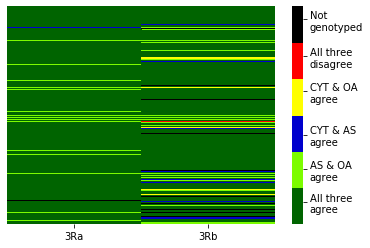

In [15]:
heat_map = sns.heatmap(trimmed, 
                       cmap = ['darkgreen', 'lawngreen', 'mediumblue', 
                               'yellow', 'red', 'black'], 
                       xticklabels=['3Ra','3Rb'], 
                       yticklabels=False,\
                       linecolor='white')

heat_map.set_ylabel("")

colorbar = heat_map.collections[0].colorbar
colorbar.set_ticks([0.5,1.25,2.05,3.05,3.85,4.7])
colorbar.set_ticklabels(['All three \nagree', 'AS & OA \nagree', 'CYT & AS \nagree',
                         'CYT & OA \nagree','All three \ndisagree','Not \ngenotyped'])